<a href="https://colab.research.google.com/github/ImranMajeedMir/IPL-project-Task4/blob/main/imran's_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import numpy as np
import pandas as pd
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for interactiveness
from ipywidgets import interact
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

In [125]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
dataset_path = '/content/drive/MyDrive/DDOS.csv'
df = pd.read_csv(dataset_path)
df.head(10)


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [128]:
print("shape of dataset:", df.shape)

shape of dataset: (104345, 23)


In [129]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [130]:
# checking the missing values in the dataset
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [131]:
# Fill null values with the mean of the column
df['rx_kbps'].fillna(df['rx_kbps'].mean(), inplace=True)
# Fill null values with the mean of the column
df['tot_kbps'].fillna(df['tot_kbps'].mean(), inplace=True)



In [132]:
df.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [133]:
df.duplicated().sum()

5091

In [134]:
df.drop_duplicates(inplace=True)

In [135]:
df.shape

(99254, 23)

In [136]:
# Creating a new feature by combining existing features
df['avg_pktsize'] = df['bytecount'] / df['pktcount']

In [137]:
df.shape


(99254, 24)

In [138]:
df.isnull().sum()

dt              0
switch          0
src             0
dst             0
pktcount        0
bytecount       0
dur             0
dur_nsec        0
tot_dur         0
flows           0
packetins       0
pktperflow      0
byteperflow     0
pktrate         0
Pairflow        0
Protocol        0
port_no         0
tx_bytes        0
rx_bytes        0
tx_kbps         0
rx_kbps         0
tot_kbps        0
label           0
avg_pktsize    70
dtype: int64

In [139]:
# Fill null values with the mean of the column
df['avg_pktsize'].fillna(df['avg_pktsize'].mean(), inplace=True)

In [140]:
df.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
avg_pktsize    0
dtype: int64

In [141]:
df.duplicated().sum()

0

In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_values = scaler.fit_transform(df[['avg_pktsize']])

In [143]:
print(df.dtypes)

dt               int64
switch           int64
src             object
dst             object
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol        object
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps        float64
tot_kbps       float64
label            int64
avg_pktsize    float64
dtype: object


In [144]:
df['label'].value_counts()

0    61248
1    38006
Name: label, dtype: int64

In [145]:
df.shape

(99254, 24)

In [146]:
# Select the features for X
X = df[['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'avg_pktsize']]

# Select the target variable for y
y = df['label']

In [147]:
print(df.columns)

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label', 'avg_pktsize'],
      dtype='object')


In [170]:
df.head(5)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,avg_pktsize
0,11425,1,0,16,45304,48294064,100,716000000,1.010000e+11,3,...,0,2,3,143928631,3917,0,0.0,0.0,0,1066.0
1,11605,1,0,16,126395,134737070,280,734000000,2.810000e+11,2,...,0,2,4,3842,3520,0,0.0,0.0,0,1066.0
2,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,0,2,1,3795,1242,0,0.0,0.0,0,1066.0
3,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,0,2,2,3688,1492,0,0.0,0.0,0,1066.0
4,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,0,2,3,3413,3665,0,0.0,0.0,0,1066.0


In [149]:
df['Protocol'].value_counts()

ICMP    41321
TCP     29436
UDP     28497
Name: Protocol, dtype: int64

In [150]:
df['src'].value_counts()

10.0.0.3     11092
10.0.0.7     10313
10.0.0.10     8492
10.0.0.1      7864
10.0.0.12     7805
10.0.0.2      7640
10.0.0.9      7185
10.0.0.5      7175
10.0.0.11     5885
10.0.0.4      5677
10.0.0.8      5241
10.0.0.6      2581
10.0.0.13     2276
10.0.0.14     2265
10.0.0.18     2230
10.0.0.15     1858
10.0.0.16     1789
10.0.0.17      980
10.0.0.20      906
Name: src, dtype: int64

In [151]:
print(df.columns)

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label', 'avg_pktsize'],
      dtype='object')


In [152]:
target = []
for i in df.columns:
  col = df[i]
  if type(col[0]) == str:
    target.append(i)
    print(i)

src
dst
Protocol


In [153]:
from sklearn.preprocessing import LabelEncoder
for i in target:
  encoder = LabelEncoder()
  encoder.fit(list(df[i]))
  df[i] = encoder.fit_transform(df[i])

In [154]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame containing the dataset

# Extract the features and target variable
X = df[['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
        'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes',
        'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'avg_pktsize']]
y = df['label']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to normalize the features
X_scaled = scaler.fit_transform(X)

# Convert the normalized features back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Print the normalized dataset
print(X_scaled_df)


             dt    switch  pktcount  bytecount       dur  dur_nsec   tot_dur  \
0     -0.578287 -1.648669 -0.128336   0.245724 -0.793499  0.924294 -0.791684   
1     -0.563367 -1.648669  1.419230   2.032347 -0.167888  0.988968 -0.165819   
2     -0.578287 -1.648669  0.731011   1.237818 -0.445937  1.024898 -0.443981   
3     -0.578287 -1.648669  0.731011   1.237818 -0.445937  1.024898 -0.443981   
4     -0.578287 -1.648669  0.731011   1.237818 -0.445937  1.024898 -0.443981   
...         ...       ...       ...        ...       ...       ...       ...   
99249 -1.089137 -0.633293 -0.991425  -0.752268 -0.859535  1.377010 -0.858297   
99250 -1.089137 -0.633293 -0.991425  -0.752268 -0.859535  1.377010 -0.858297   
99251 -1.089137 -0.633293 -0.992341  -0.752366 -1.033316  1.244069 -1.032277   
99252 -1.089137 -0.633293 -0.992341  -0.752366 -1.033316  1.244069 -1.032277   
99253 -1.089137 -0.633293 -0.992341  -0.752366 -1.033316  1.244069 -1.032277   

          flows  packetins  pktperflow 

In [155]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Assuming 'X' is the feature matrix and 'y' is the target variable

# Extract the features and target variable
X = df[['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
        'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
        'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'avg_pktsize']]
y = df['label']

# Apply the IGR feature selection
selector = SelectKBest(score_func=mutual_info_classif, k='all')
X_new = selector.fit_transform(X, y)

# Get the IGR scores for each feature
igr_scores = selector.scores_

# Create a DataFrame to display the feature names and their corresponding IGR scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'IGR Score': igr_scores})
feature_scores = feature_scores.sort_values(by='IGR Score', ascending=False)

# Print the feature scores
print(feature_scores)


        Feature  IGR Score
5     bytecount   0.628931
4      pktcount   0.611302
12  byteperflow   0.550641
11   pktperflow   0.532637
22  avg_pktsize   0.477188
13      pktrate   0.377184
0            dt   0.284854
8       tot_dur   0.259785
17     tx_bytes   0.206311
10    packetins   0.194185
6           dur   0.192489
18     rx_bytes   0.181194
21     tot_kbps   0.105970
2           src   0.076771
20      rx_kbps   0.076489
19      tx_kbps   0.070321
7      dur_nsec   0.058550
15     Protocol   0.040995
3           dst   0.037060
9         flows   0.026454
14     Pairflow   0.008738
1        switch   0.006320
16      port_no   0.003806


In [156]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is your DataFrame containing the dataset
# Assuming 'X' is the feature matrix and 'y' is the target variable

# Extract the features and target variable
X = df[['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
        'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
        'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'avg_pktsize']]
y = df['label']

# Create a base estimator for RFE (e.g., Logistic Regression)
estimator = LogisticRegression()

# Apply Recursive Feature Elimination
selector = RFECV(estimator, scoring='accuracy')
X_new = selector.fit_transform(X, y)

# Get the feature rankings from RFE
rfe_rankings = selector.ranking_

# Create a DataFrame to display the feature names and their corresponding rankings
feature_rankings = pd.DataFrame({'Feature': X.columns, 'RFE Ranking': rfe_rankings})
feature_rankings = feature_rankings.sort_values(by='RFE Ranking', ascending=True)

# Print the feature rankings
print(feature_rankings)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

        Feature  RFE Ranking
0            dt            1
18     rx_bytes            1
17     tx_bytes            1
12  byteperflow            1
5     bytecount            1
11   pktperflow            1
4      pktcount            1
7      dur_nsec            2
8       tot_dur            3
10    packetins            4
21     tot_kbps            5
20      rx_kbps            6
22  avg_pktsize            7
19      tx_kbps            8
13      pktrate            9
2           src           10
9         flows           11
3           dst           12
15     Protocol           13
1        switch           14
16      port_no           15
14     Pairflow           16
6           dur           17


In [157]:
selected_features = ['bytecount', 'pktcount', 'pktperflow', 'byteperflow', 'dt']
df1 = df[selected_features]
df1.shape




(99254, 5)

In [163]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.metrics import confusion_matrix

# 'df' is a DataFrame containing the dataset
# 'y' is the target variable

# Select the features
selected_features = ['bytecount', 'pktcount', 'pktperflow', 'byteperflow', 'dt']
df1 = df[selected_features]

# Split the data into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(df1, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for input to the GRU model
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_reshaped = np.reshape(X_val_scaled, (X_val_scaled.shape[0], X_val_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the GRU model architecture
model = Sequential()
model.add(GRU(128, input_shape=(X_train_scaled.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_val_reshaped, y_val))

# Predict the labels for the test data
y_pred_prob = model.predict(X_test_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)



# Predict the labels for the test data
y_pred = model.predict(X_test_reshaped)
# Convert predicted probabilities to binary labels
threshold = 0.5
y_pred_binary = np.where(y_pred_prob > threshold, 1, 0)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Access validation loss and accuracy from history
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Print the validation loss and accuracy
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


Epoch 1/20
2482/2482 [==============================] - 44s 16ms/step - loss: 0.2668 - accuracy: 0.8712 - val_loss: 0.2285 - val_accuracy: 0.8989
Epoch 2/20
2482/2482 [==============================] - 39s 16ms/step - loss: 0.1949 - accuracy: 0.9166 - val_loss: 0.1892 - val_accuracy: 0.9273
Epoch 3/20
2482/2482 [==============================] - 37s 15ms/step - loss: 0.1679 - accuracy: 0.9281 - val_loss: 0.1504 - val_accuracy: 0.9355
Epoch 4/20
2482/2482 [==============================] - 39s 16ms/step - loss: 0.1532 - accuracy: 0.9346 - val_loss: 0.1384 - val_accuracy: 0.9386
Epoch 5/20
2482/2482 [==============================] - 39s 16ms/step - loss: 0.1457 - accuracy: 0.9375 - val_loss: 0.1275 - val_accuracy: 0.9482
Epoch 6/20
2482/2482 [==============================] - 37s 15ms/step - loss: 0.1380 - accuracy: 0.9410 - val_loss: 0.1567 - val_accuracy: 0.9433
Epoch 7/20
2482/2482 [==============================] - 39s 16ms/step - loss: 0.1299 - accuracy: 0.9453 - val_loss: 0.1139 -

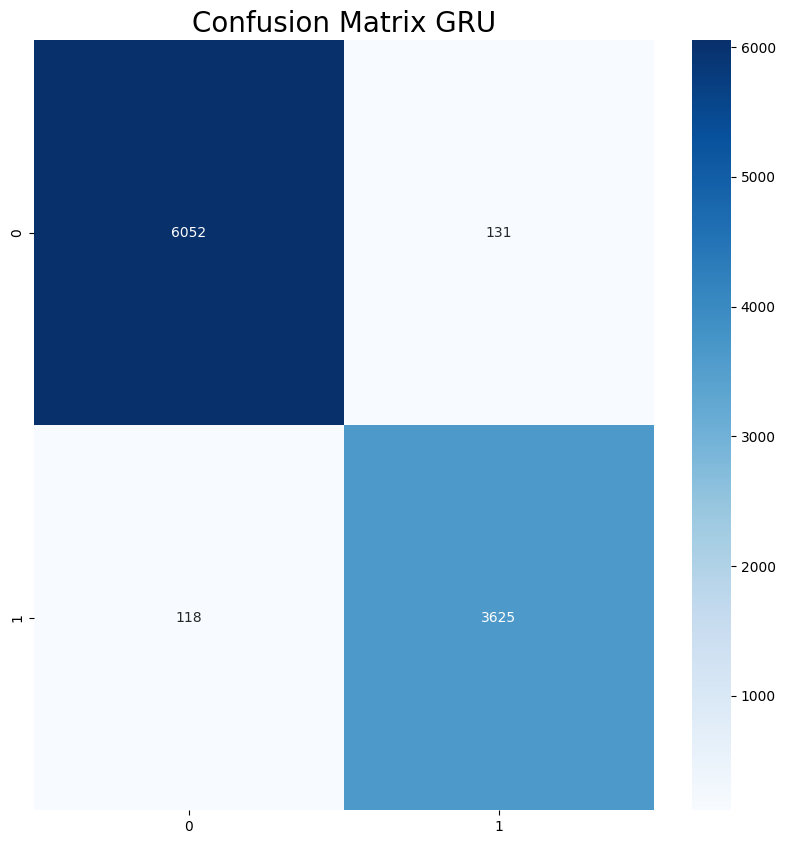

In [164]:
from sklearn.metrics import confusion_matrix
# lets print the confusion matrix first
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix GRU', fontsize = 20)
plt.show()

In [166]:
# lets print the classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_binary)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6183
           1       0.97      0.97      0.97      3743

    accuracy                           0.97      9926
   macro avg       0.97      0.97      0.97      9926
weighted avg       0.97      0.97      0.97      9926



In [168]:
# Calculate performance metrics from the confusion matrix
tn, fp, fn, tp = confusion.ravel()

detection_rate = (tp / (tp + fn)) * 100
false_positive_rate = (fp / (fp + tn)) * 100
precision = (tp / (tp + fp)) * 100
f1_measure = (2 * (precision * detection_rate) / (precision + detection_rate))

# Print the performance metrics
print("Detection Rate:", detection_rate, "%")
print("False Positive Rate:", false_positive_rate, "%")
print("Precision:", precision, "%")
print("F1 Measure:", f1_measure, "%")

Detection Rate: 96.84744857066524 %
False Positive Rate: 2.118712599061944 %
Precision: 96.51224707135249 %
F1 Measure: 96.67955727430324 %
